In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('..\\datasets\\00-fraud-detection\\creditcard_2023.csv')
#https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/discussion/450569

__the dataset has be PCA which means not much insights we can gather here__

In [3]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
cor=data.corr()
cor['Class']

id        0.864283
V1       -0.505761
V2        0.491878
V3       -0.682095
V4        0.735981
V5       -0.338639
V6       -0.435088
V7       -0.491234
V8        0.144294
V9       -0.585522
V10      -0.673665
V11       0.724278
V12      -0.768579
V13      -0.071105
V14      -0.805669
V15      -0.037948
V16      -0.573511
V17      -0.476377
V18      -0.410091
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24      -0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
Class     1.000000
Name: Class, dtype: float64

<Axes: >

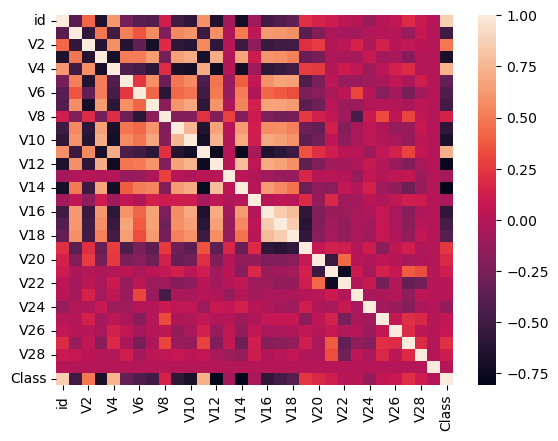

In [5]:
sns.heatmap(cor)

[]

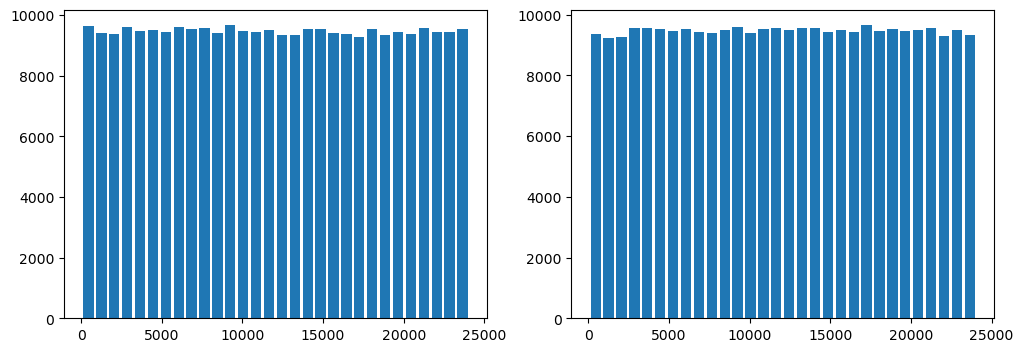

In [6]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(data[data['Class']==0]['Amount'],rwidth=0.8,bins=30)
axes[1].hist(data[data['Class']==1]['Amount'],rwidth=0.8,bins=30)
plt.plot()

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [8]:
model=XGBClassifier()

In [9]:
X=data.drop(columns=['Class','id'])
Y=data['Class']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.8)

In [11]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
model.score(x_test,y_test)

0.9994020716458857

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
y_pred=model.predict(x_test)

In [15]:
cm=confusion_matrix(y_test,y_pred)

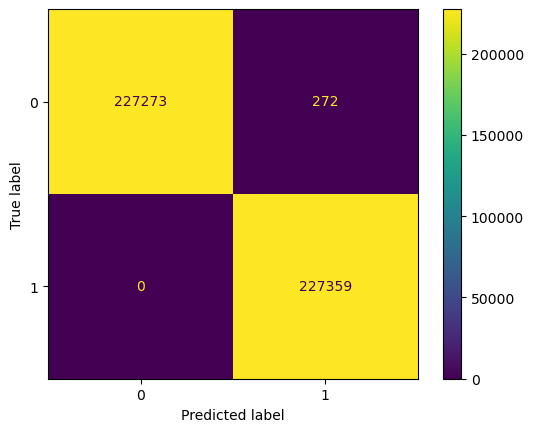

In [16]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()